In [1]:
from qiskit import QuantumCircuit, Aer, execute
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram

In [2]:
from math import sqrt

In [4]:
%matplotlib inline

In [35]:
#Qiskit Teleportation Circuit

circuit = QuantumCircuit (3,3) #Creating a quantum circuit using 3 classical and 3 quantum bits
circuit.draw()

q_0: 
     
q_1: 
     
q_2: 
     
c: 3/

In [36]:
circuit.x(0)
circuit.barrier()

circuit.h(1)
circuit.cx(1,2)

In [41]:
circuit.cx(0,1)
circuit.h(0)

#measurements

circuit.measure([0,1],[0,1])
circuit.draw()

┌───┐ ░                ┌───┐┌─┐             ┌───┐┌─┐
q_0: ┤ X ├─░─────────────■──┤ H ├┤M├──────■───■──┤ H ├┤M├
     └───┘ ░ ┌───┐     ┌─┴─┐└┬─┬┘└╥┘      │ ┌─┴─┐└┬─┬┘└╥┘
q_1: ──────░─┤ H ├──■──┤ X ├─┤M├──╫───■───┼─┤ X ├─┤M├──╫─
           ░ └───┘┌─┴─┐└───┘ └╥┘  ║ ┌─┴─┐ │ └┬─┬┘ └╥┘  ║ 
q_2: ──────░──────┤ X ├───────╫───╫─┤ X ├─■──┤M├───╫───╫─
           ░      └───┘       ║   ║ └───┘    └╥┘   ║   ║ 
c: 3/═════════════════════════╩═══╩═══════════╩════╩═══╩═
                              1   0           2    1   0

In [38]:
circuit.cx(1,2)
circuit.cz(0,2)
circuit.measure(2,2)

In [39]:
backend= Aer.get_backend("qasm_simulator")
counts= execute(circuit,backend,shots=1024).result().get_counts()
print(counts)

{'100': 243, '101': 265, '110': 239, '111': 277}


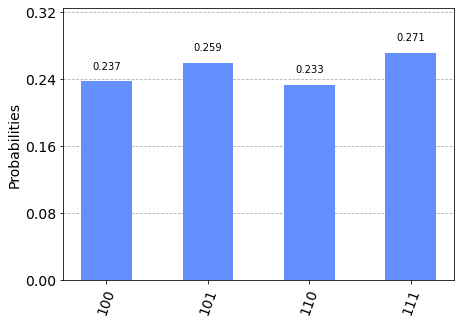

In [40]:
plot_histogram(counts)

In [42]:
from qiskit import QuantumCircuit, Aer, execute
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram

In [44]:
qc = QuantumCircuit(3,3)
qc.h(0) #Converting q0 State from |0> to |+>

In [45]:
#Converting q1 and q2 in entaglement state
qc.h(1)
qc.cx(1,2)

In [47]:
qc.cx(0,1)
qc.h(0) #check for x


In [48]:
#measurements
qc.measure([0,1],[0,1])
qc.cx(1,2)
qc.cz(0,2)
qc.measure(2,2)
qc.draw()

┌───┐          ┌───┐     ┌───┐┌─┐        
q_0: ┤ H ├───────■──┤ H ├──■──┤ H ├┤M├──────■─
     ├───┤     ┌─┴─┐└───┘┌─┴─┐└┬─┬┘└╥┘      │ 
q_1: ┤ H ├──■──┤ X ├─────┤ X ├─┤M├──╫───■───┼─
     └───┘┌─┴─┐└───┘     └───┘ └╥┘  ║ ┌─┴─┐ │ 
q_2: ─────┤ X ├─────────────────╫───╫─┤ X ├─■─
          └───┘                 ║   ║ └───┘   
c: 3/═══════════════════════════╩═══╩═════════
                                1   0

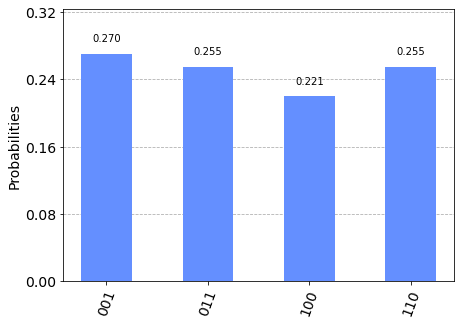

In [50]:
#Checking if circuit works

backend= Aer.get_backend("qasm_simulator")
counts= execute(qc,backend, shots= 1024).result().get_counts()

plot_histogram(counts)

# Note that in our result, 50% of the times c_2 measures as 0 and other 50% it measures as 1 - just like the |+> state should.